# EDA on Bank customer Churn & Predict the Churn customer using Machine Learning 

### Main Objective:

The main agenda of this project is:

 1. Perform Exploratory Data Analysis(EDA) on the Customer Churn Dataset.

 2. Build an Machine Learning Model that will help to predict whether the customer likely to churn or not.

# import the necessary libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.metrics import confusion_matrix , classification_report
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Analysis

In [6]:
bc=pd.read_csv("bc.csv")

In [7]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [8]:
bc.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [9]:
bc.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


drop the unnecessary columns

In [10]:
bc=bc.drop(columns=['RowNumber','CustomerId','Surname'])

check & drop duplicate values

In [11]:
bc.duplicated().sum()

2

In [12]:
bc.drop_duplicates(inplace=True)

In [13]:
bc.duplicated().sum()

0

# check & modify the null values

In [14]:
bc.isnull().sum()

CreditScore        0
Geography          1
Gender             0
Age                1
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          1
IsActiveMember     1
EstimatedSalary    0
Exited             0
dtype: int64

In [15]:
a=bc['Geography'].mode().values[0]
a

'France'

In [16]:
bc['Geography'].fillna(a,inplace=True)

In [17]:
b=bc['Age'].mode().values[0]
b

37.0

In [18]:
bc['Age'].fillna(b,inplace=True)

In [19]:
c=bc['HasCrCard'].mode().values[0]
c

1.0

In [20]:
bc['HasCrCard'].fillna(c,inplace=True)

In [21]:
d=bc['IsActiveMember'].mode().values[0]
d

1.0

In [22]:
bc['IsActiveMember'].fillna(d,inplace=True)

In [23]:
bc.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
bc['EstimatedSalary']=round(bc['EstimatedSalary'])
bc['Balance']=round(bc['Balance'])

In [25]:
bc.groupby("Exited").mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,
0,651.853196,37.409774,5.033279,72745.301896,1.544267,0.707146,0.554565,99738.386161
1,645.351497,44.837997,4.932744,91108.538046,1.475209,0.699067,0.360825,101465.682376


In [26]:
bc.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.922903,5.012800,76485.893100,1.530200,0.70550,0.515100,100090.236400,0.203700
std,96.653299,10.487128,2.892174,62397.409041,0.581654,0.45584,0.499797,57510.492127,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,12.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.500000,1.000000,1.00000,1.000000,100193.500000,0.000000
75%,718.000000,44.000000,7.000000,127644.000000,2.000000,1.00000,1.000000,149388.000000,0.000000
max,850.000000,92.000000,10.000000,250898.000000,4.000000,1.00000,1.000000,199992.000000,1.000000


In [27]:
bc['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

# Visualisation

Text(0.5, 1.0, 'age vs estimated salary')

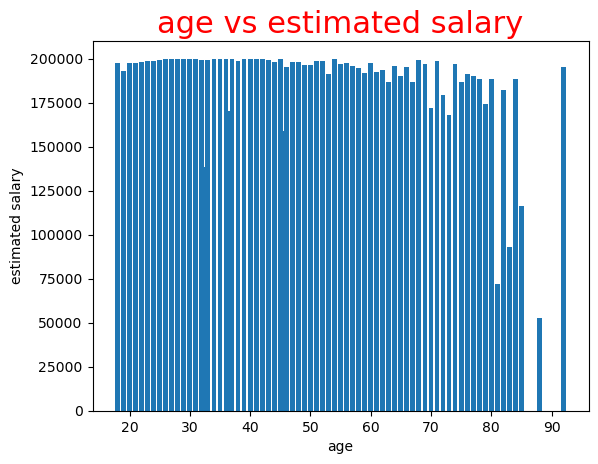

In [28]:
x=bc.Age
y=bc.EstimatedSalary
plt.bar(x,y)
plt.xlabel("age")
plt.ylabel("estimated salary")
plt.title("age vs estimated salary",fontsize=22,color='r')

Observation

We can infer from the analysis that mostly all age group have salary in 150,000 to 200,000

<Axes: xlabel='Gender', ylabel='count'>

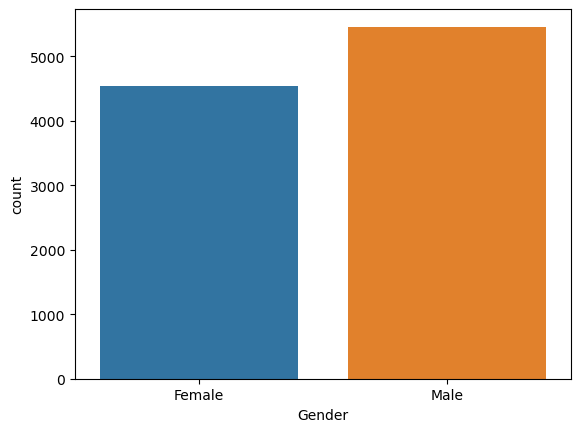

In [29]:
sns.countplot(data=bc,x='Gender')

Observation

Male customer are high in this dataset

<Axes: xlabel='Gender', ylabel='CreditScore'>

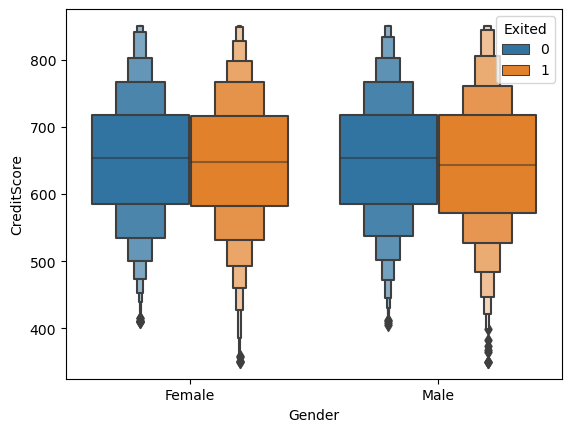

In [30]:
sns.boxenplot(data=bc,x='Gender',y="CreditScore",hue='Exited')

<Axes: xlabel='Gender', ylabel='Tenure'>

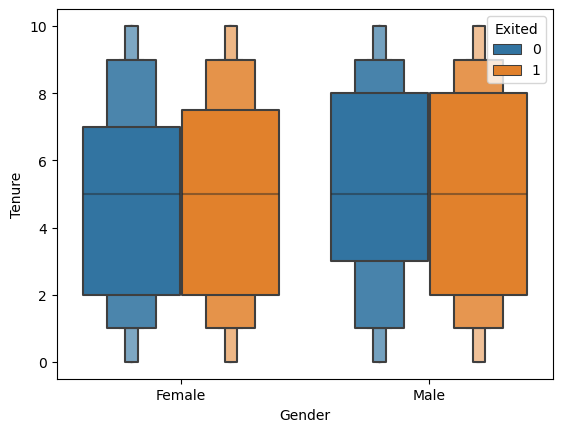

In [31]:
sns.boxenplot(data=bc,x='Gender',y="Tenure",hue='Exited')

<Axes: xlabel='CreditScore', ylabel='Age'>

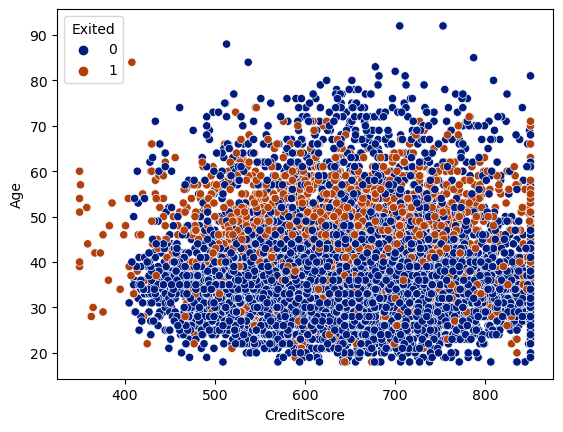

In [32]:
sns.scatterplot(data=bc,x='CreditScore',y='Age',hue='Exited',palette='dark')

Observation

Below Creditscore 400 all the customer are churn.                                                 
Credit score in range 500 to 700 with Age between 40-60 got highly churn.

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

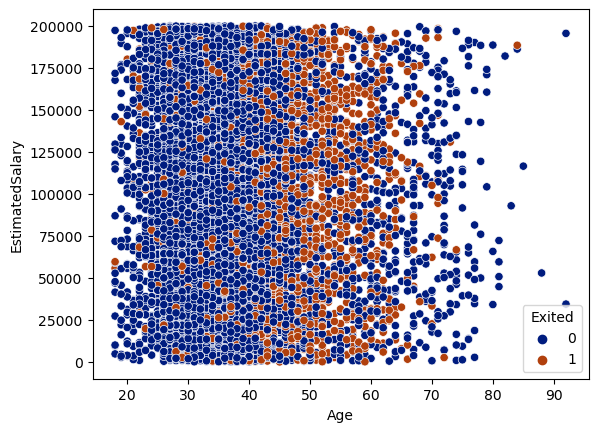

In [33]:
sns.scatterplot(data=bc,x='Age',y='EstimatedSalary',hue='Exited',palette='dark')

Observation

Customer with age between 40 to 60 are high in churn

<Axes: xlabel='Age', ylabel='Balance'>

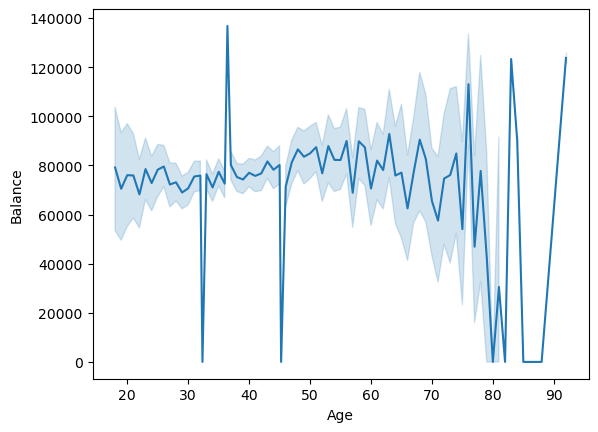

In [34]:
sns.lineplot(data=bc,x='Age',y='Balance')

Observation

Age between 50 to 70 have average balance.

Mid age of 30-40 and 80-90 have low balance.

<Axes: xlabel='Geography', ylabel='count'>

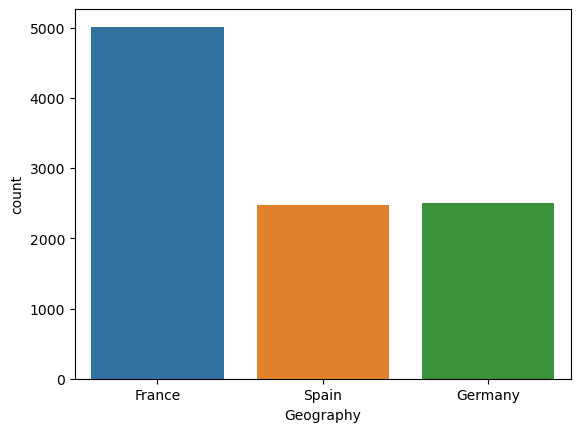

In [35]:
sns.countplot(data=bc,x="Geography")

<Axes: xlabel='Geography', ylabel='count'>

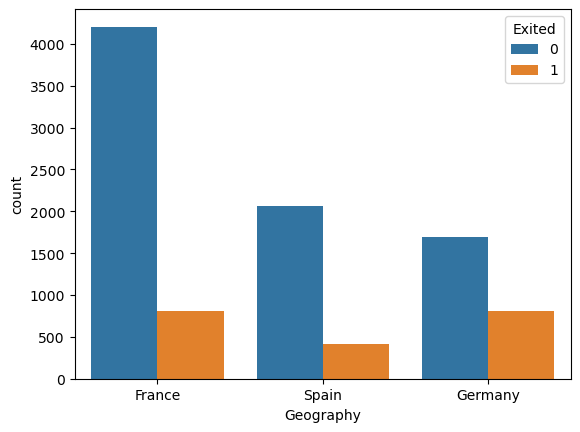

In [36]:
sns.countplot(data=bc,x="Geography",hue="Exited")

Observation

We can infer from the analysis that most of the churn from France and Germany

<Axes: xlabel='Gender', ylabel='count'>

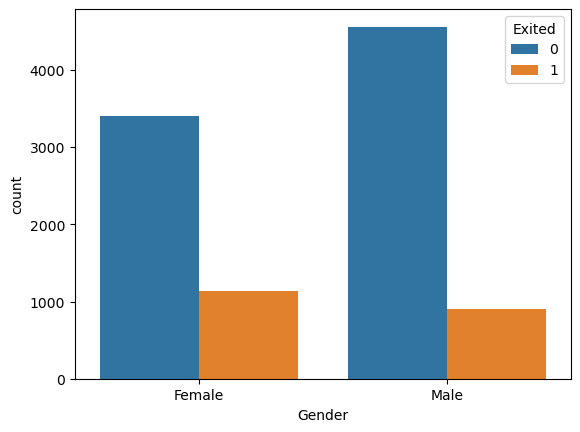

In [37]:
sns.countplot(data=bc, x="Gender",hue="Exited")

Observation

More Exited customer are Female.

<Axes: xlabel='NumOfProducts', ylabel='count'>

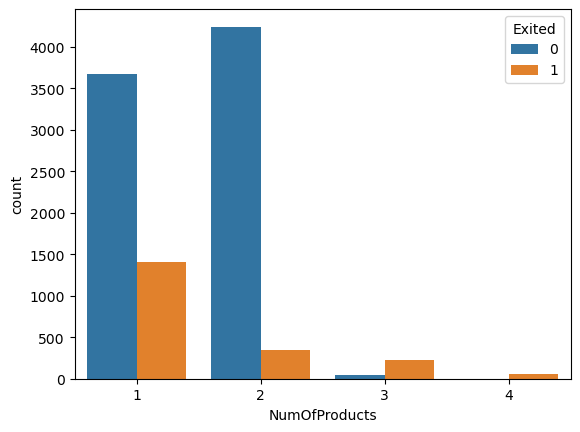

In [38]:
sns.countplot(data=bc, x="NumOfProducts",hue="Exited")

Observation

Most of the Bank customers with only one product like savings accounts got churn.


<Axes: xlabel='HasCrCard', ylabel='count'>

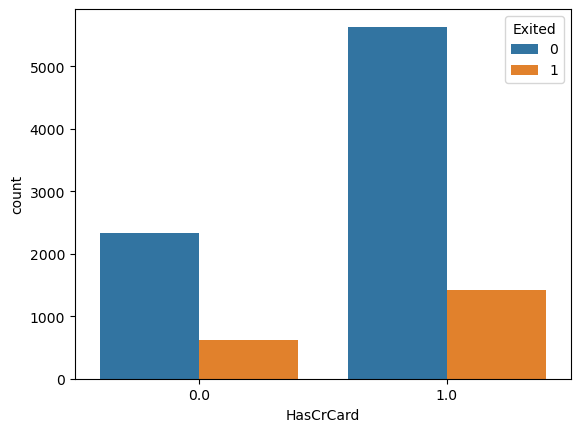

In [39]:
sns.countplot(data=bc, x="HasCrCard",hue="Exited")

Observation

Mostly customer having credit card got churn.

<Axes: xlabel='IsActiveMember', ylabel='count'>

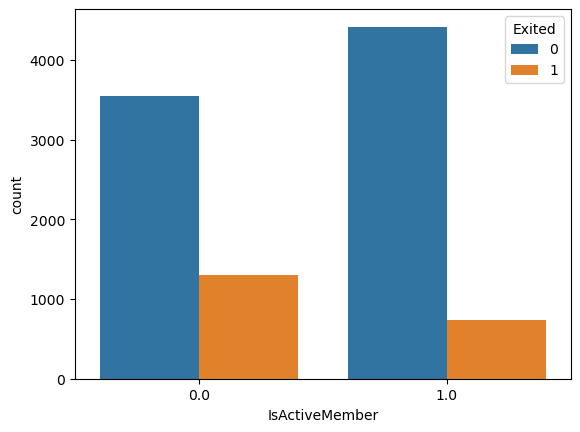

In [40]:
sns.countplot(data=bc, x="IsActiveMember",hue="Exited")

Observation

If customer is less active member then got high chance to be as  churn.

<Axes: xlabel='Tenure', ylabel='count'>

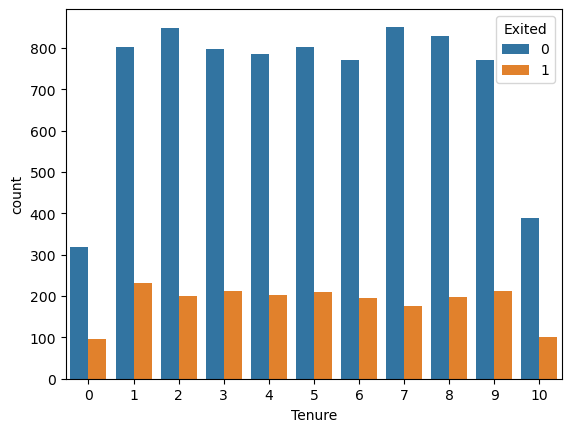

In [41]:
sns.countplot(data=bc, x="Tenure",hue="Exited")

Observation

Most of the Customer with tenure range 1 to 5 years are churn. 

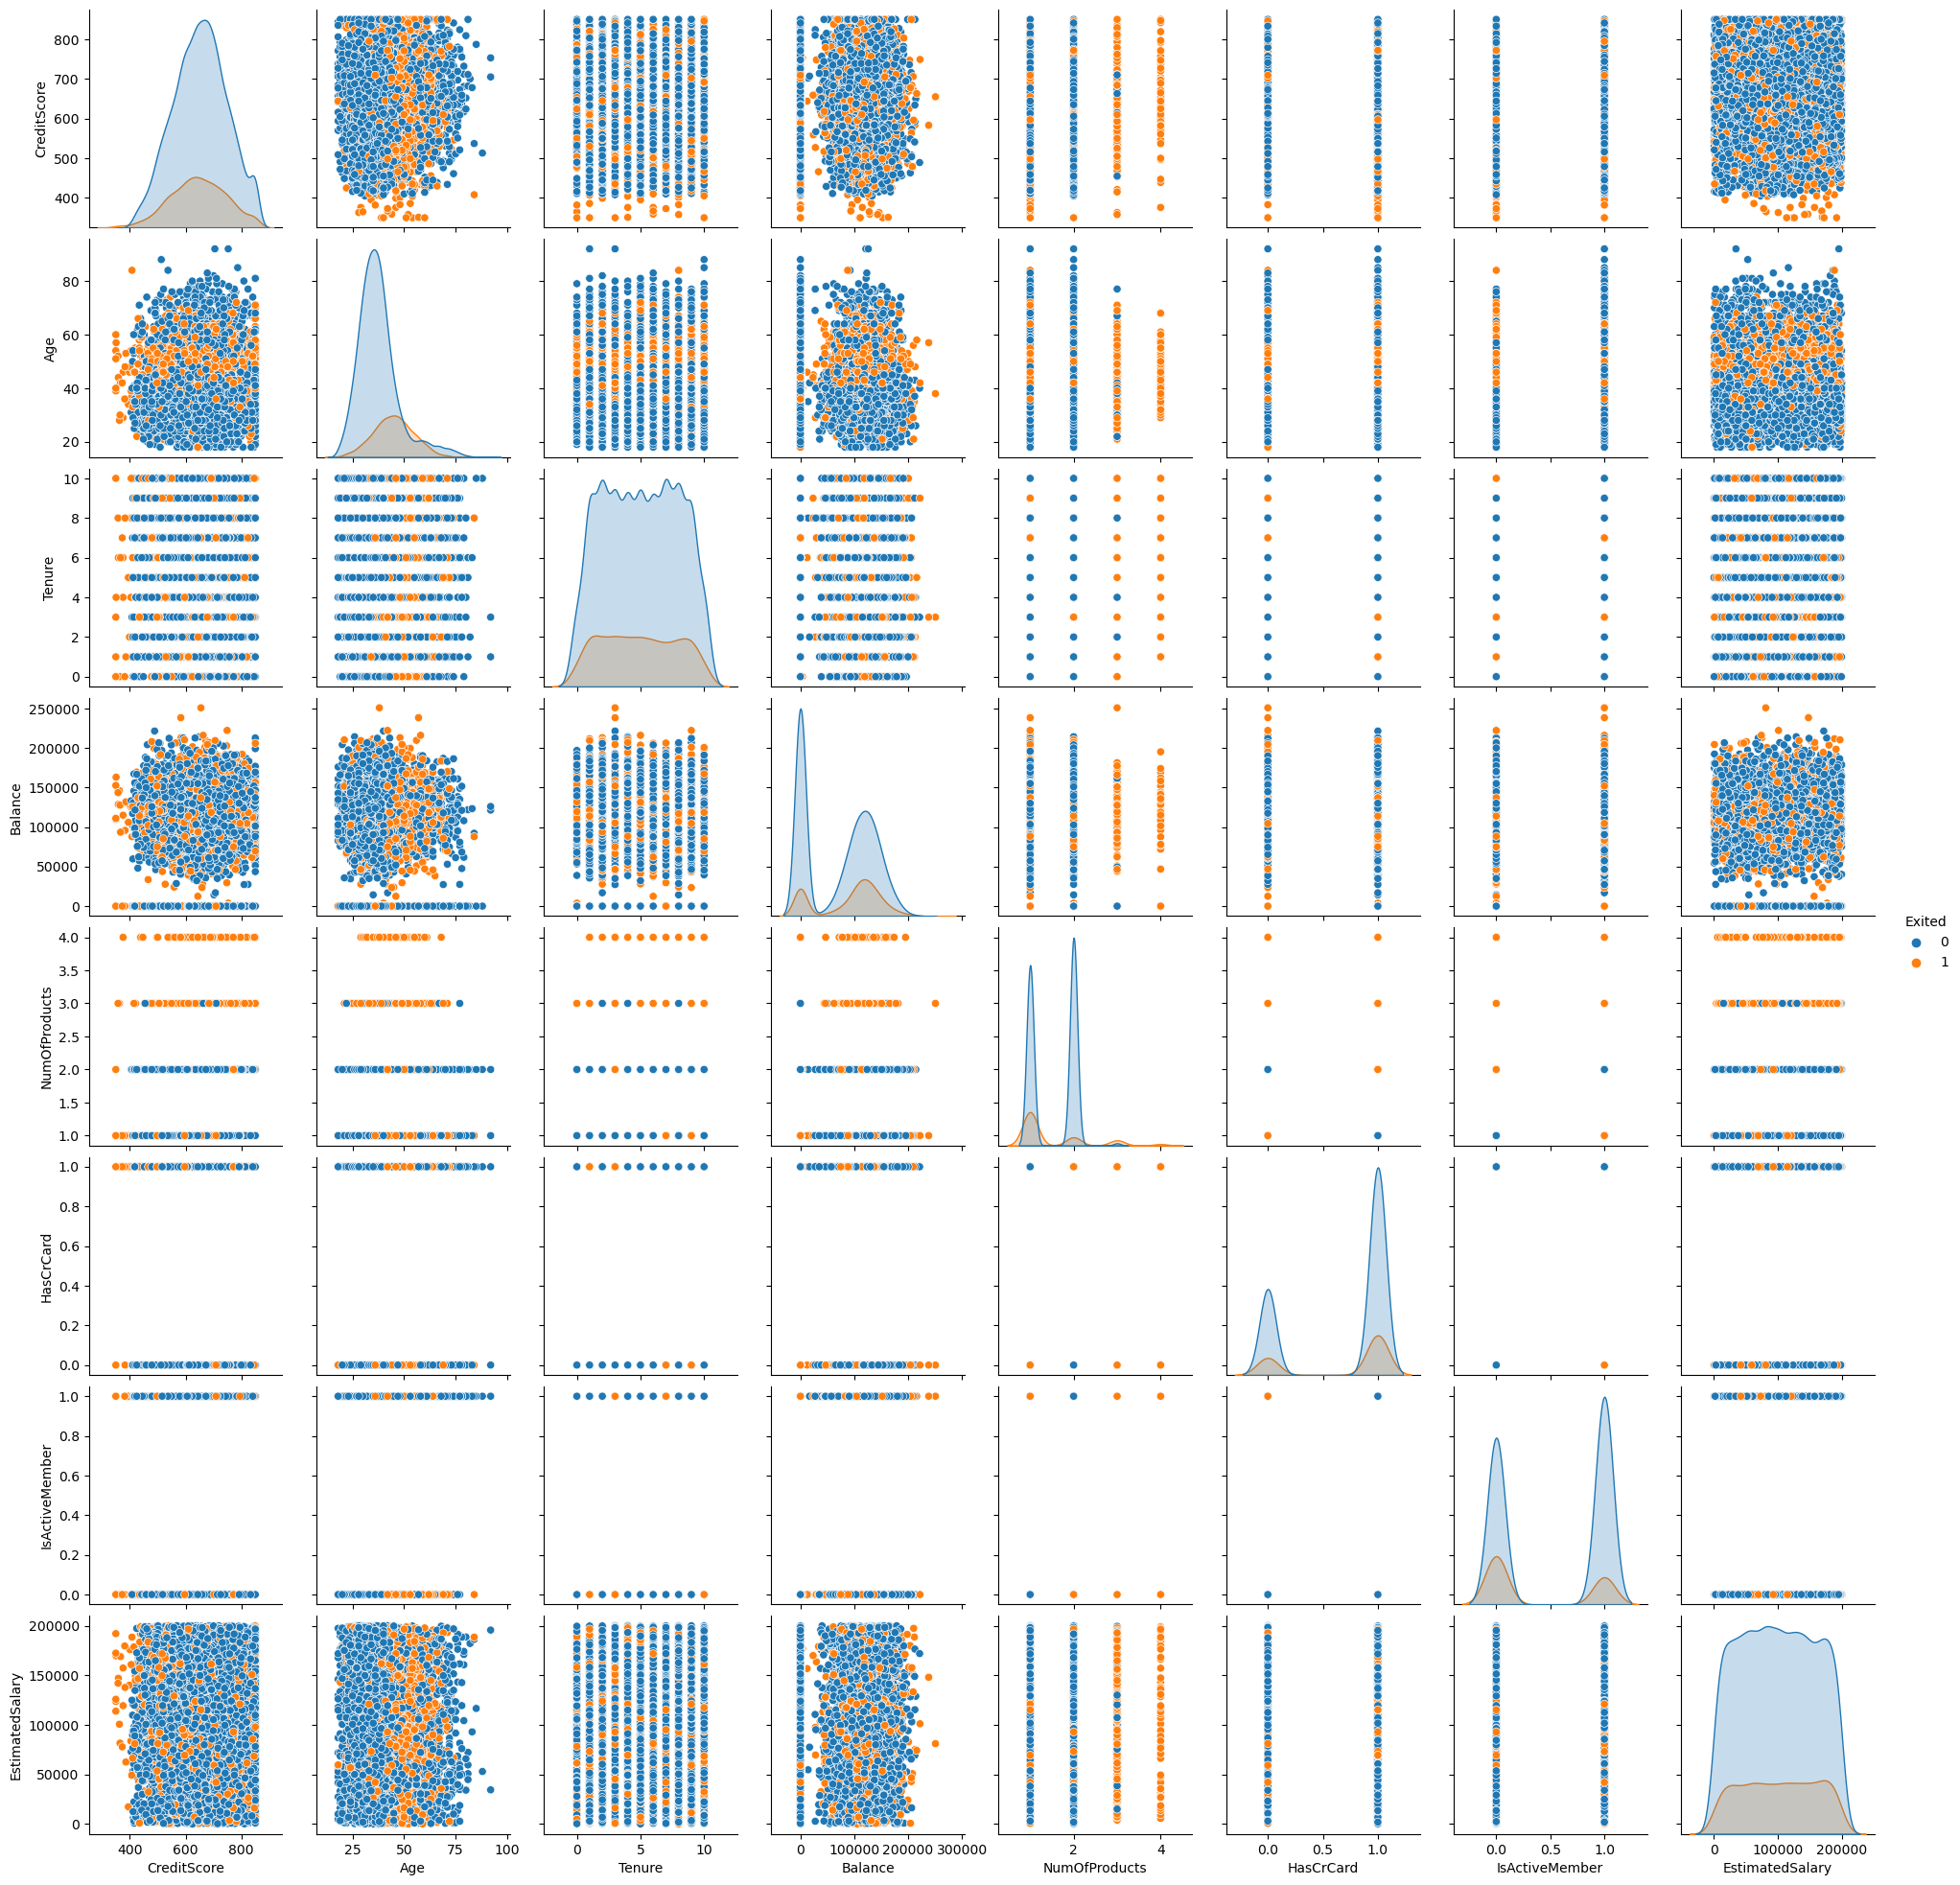

In [42]:
sns.pairplot(data=bc,hue='Exited')
plt.show()

# Encoding

In [45]:
le=LabelEncoder()
bc['Geography']=le.fit_transform(bc['Geography'])
bc['Gender']=le.fit_transform(bc['Gender'])

In [46]:
bc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42.0,2,0.0,1,1.0,1.0,101349.0,1
1,608,2,0,41.0,1,83808.0,1,0.0,1.0,112543.0,0
2,502,0,0,42.0,8,159661.0,3,1.0,0.0,113932.0,1
3,699,0,0,39.0,1,0.0,2,0.0,0.0,93827.0,0
4,850,2,0,43.0,2,125511.0,1,1.0,1.0,79084.0,0


# Data Normalisation

In [72]:
i=bc.iloc[:,0:10]
d=bc.Exited

In [73]:
std = StandardScaler()
std.fit(i)
std_data= std.transform(i)
print(std_data)

[[-0.32622142 -0.90188624 -1.09598752 ...  0.64609167  0.97024255
   0.02188864]
 [-0.44003595  1.51506738 -1.09598752 ... -1.54776799  0.97024255
   0.21654112]
 [-1.53679418 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
   0.24069444]
 ...
 [ 0.60498839 -0.90188624 -1.09598752 ... -1.54776799  0.97024255
  -1.00863572]
 [ 1.25683526  0.30659057  0.91241915 ...  0.64609167 -1.03067011
  -0.12522231]
 [ 1.46377078 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
  -1.07636588]]


In [74]:
i = std_data
i

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188864],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21654112],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.24069444],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00863572],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12522231],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636588]])

In [75]:
d

0        1
1        0
2        1
3        0
4        0
        ..
9995     0
9996     0
9997     1
9998     1
10000    0
Name: Exited, Length: 10000, dtype: int64

# Train Test Split

In [76]:
i_train,i_test,d_train,d_test = train_test_split(i,d,test_size=0.3,stratify=d, random_state=10)

In [77]:
print(i_train.shape,d_train.shape,i_test.shape,d_test.shape)

(7000, 10) (7000,) (3000, 10) (3000,)


# Accuracy Score for Different Model

# Support Vector Machine

In [78]:
svc_obj = svm.SVC()
svc_obj.fit(i_train,d_train)
print("SVC model accuracy ")
svm_acc=svc_obj.score(i_test,d_test)
svm_acc

SVC model accuracy 


0.8546666666666667

# Random Forest Classifier

In [79]:
ran_obj = RandomForestClassifier()
ran_obj.fit(i_train,d_train)
print("Random Forest Classifier accuracy")
rfc_acc=ran_obj.score(i_test,d_test)
rfc_acc

Random Forest Classifier accuracy


0.859

# Naive Bayes Classifier

In [80]:
nb_classifier = GaussianNB()
nb_classifier.fit(i_train, d_train)
print("Naive Bayes classifier accuracy")
nb_acc=nb_classifier.score(i_test,d_test)
nb_acc

Naive Bayes classifier accuracy


0.8253333333333334

# Logistic Regression

In [81]:
logreg_obj = LogisticRegression()
logreg_obj.fit(i_train,d_train)
print("Logistic Regression accuracy")
lr_acc=logreg_obj.score(i_test,d_test)
lr_acc

Logistic Regression accuracy


0.805

# Analyse and find the best model

In [82]:
results = pd.DataFrame({
    'Model': [ 'Random Forest Classifier', 
              'Support Vector Machine ', 
              'Naive Bayes',
              'Logistic Regression' 
              ],
    'Score': [ rfc_acc,
              svm_acc, 
              nb_acc,
              lr_acc]
           })
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head()

,Model,Score
0,Random Forest Classifier,0.859000
1,Support Vector Machine,0.854667
2,Naive Bayes,0.825333
3,Logistic Regression,0.805000


#### Observation

- Random Forest Classifier Model having the Highest Accuracy Score of 85.9%
- SVM Model having the Second Highest Accuracy Score of 85.4%
- Naive Bayes Model having the Third Highest Accuracy Score of 82.53%
- Logistic Regression Model have comparatively less Accuracy Score of 80.5%

# Predictive System

In [90]:
new_data = (308,2,0,41.0,1,83808,1,0,1,112543)

input_array = np.asarray(new_data)

data_reshape = input_array.reshape(1,-1)

std_input = std.transform(data_reshape)

prd = ran_obj.predict(std_input)

if (prd[0]==0):
  print("The Person not exit")
else:
  print("The Person likely to exit")

The Person likely to exit
